In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import normaltest
from scipy.stats import anderson
import statsmodels.api as sm
import streamlit as st
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import cross_val_score
import pickle
import shap
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.preprocessing import OrdinalEncoder
from sklearn.pipeline import Pipeline
from geopy.geocoders import Nominatim
from sklearn.decomposition import PCA

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


## 1. Carga de datos

In [2]:
df_mad = pd.read_csv("../Data/Processed/madrid.csv")

In [3]:
df_mad= df_mad[['Latitud','Precio_Medio_cp','Superficie_m2','Habitaciones','Baños', 'Ascensor',
       'Parking','Balcon','Aire_Acondicionado', 'Calefaccion','Piscina','Terraza','Precio']]

In [82]:
df_mad.describe()

,Latitud,Precio_Medio_cp,Superficie_m2,Habitaciones,Baños,Ascensor,Parking,Balcon,Aire_Acondicionado,Calefaccion,Piscina,Terraza,Precio
count,9666.000000,9.666000e+03,9666.000000,9666.000000,9666.000000,9666.000000,9666.000000,9666.000000,9666.000000,9666.000000,9666.000000,9666.000000,9.666000e+03
mean,40.422016,5.382725e+05,110.929030,2.665115,1.807987,0.695117,0.098800,0.174115,0.555969,0.724395,0.092179,0.366543,5.296802e+05
std,0.033236,3.413219e+05,85.219614,1.183477,1.020819,0.460382,0.298409,0.379228,0.496883,0.446842,0.289293,0.481885,5.296453e+05
min,40.331640,1.527170e+05,20.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.370000e+04
25%,40.398871,2.472710e+05,66.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.050000e+05
50%,40.422475,4.407960e+05,91.000000,3.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,3.550000e+05
75%,40.442376,7.475770e+05,127.000000,3.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,6.790000e+05
max,40.531520,1.709528e+06,2000.000000,13.000000,12.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000e+06


Creamos X e Y

In [4]:
X = df_mad.drop(columns=["Precio"], axis=1)
y = df_mad["Precio"]

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(7732, 12)
(1934, 12)
(7732,)
(1934,)


In [6]:
# Escalamos los datos del train con StandardScaler()
scal = StandardScaler() # Declaramos el modelo
scal.fit(X_train) # Entrenamos el modelo
X_train_scal = scal.transform(X_train) # Aplicamos el scaler en los datos de Train 
X_test_scal = scal.transform(X_test) # Aplicamos el scaler en los datos del test

#Reverse
#X_train = scal.inverse_transform(X_train)

In [7]:
rf_i = RandomForestRegressor()
rf_i.fit(X_train, y_train)


RandomForestRegressor()

In [8]:
importancias = rf_i.feature_importances_
nombres_caracteristicas=rf_i.feature_names_in_
indices_ordenados = np.argsort(importancias)[::-1]
indices_ordenados = np.argsort(importancias)[::-1]
for i in indices_ordenados:
    print(f"{nombres_caracteristicas[i]}: {importancias[i]}")

Superficie_m2: 0.6032935661818724
Precio_Medio_cp: 0.20312312517891773
Latitud: 0.07662611841427562
Baños: 0.07061191100790294
Habitaciones: 0.015288837926934449
Aire_Acondicionado: 0.007560137336113157
Ascensor: 0.006028493051042475
Calefaccion: 0.004513522457892313
Balcon: 0.004059920183326036
Terraza: 0.0039820437745410175
Piscina: 0.002476721666777967
Parking: 0.0024356028204039855


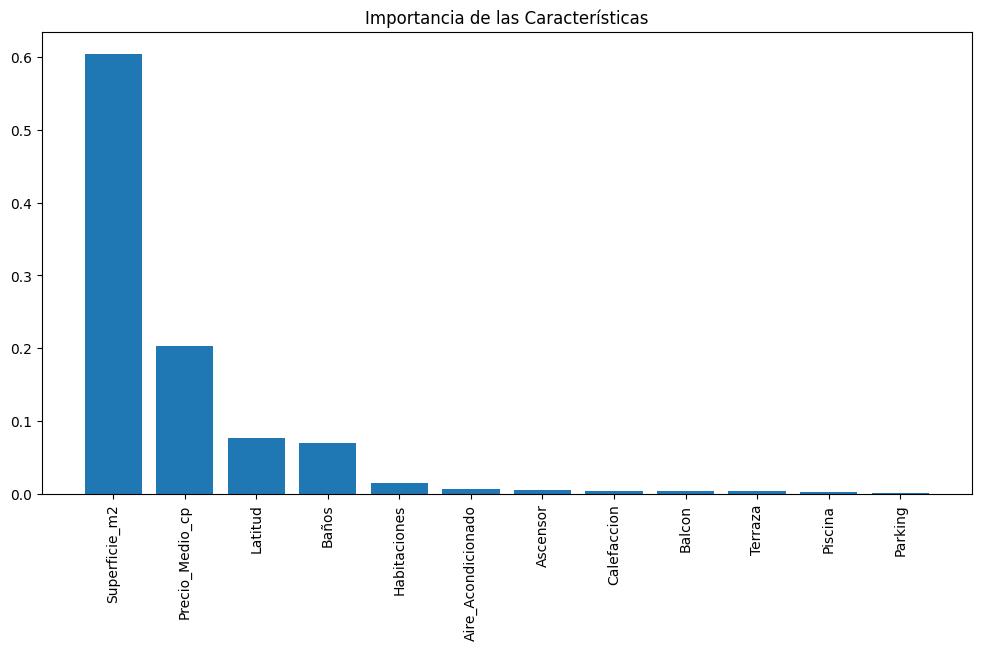

In [9]:
plt.figure(figsize=(12, 6))
plt.title("Importancia de las Características")
plt.bar(range(len(importancias)), importancias[indices_ordenados], align="center")
plt.xticks(range(len(importancias)), np.array(nombres_caracteristicas)[indices_ordenados], rotation=90)
plt.xlim([-1, len(importancias)])
plt.show()

## Regresión Lineal

In [10]:
# Entrenamos los datos escalados
linear_model_scal = LinearRegression()
linear_model_scal.fit(X_train_scal, y_train)

LinearRegression()

In [11]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

### Ridge

In [12]:
ridge_model = Ridge()
ridge_model.fit(X_train,y_train)

Ridge()

In [13]:
ridge_model_scal = Ridge()
ridge_model_scal.fit(X_train_scal,y_train)

Ridge()

### Lasso

In [14]:
Lasso_model = Lasso()
Lasso_model.fit(X_train,y_train)

Lasso()

In [15]:
Lasso_model_scal = Lasso()
Lasso_model_scal.fit(X_train_scal,y_train)

Lasso()

### Random Forest Regressor

In [16]:
rf = RandomForestRegressor()
rf.fit(X_train,y_train)

RandomForestRegressor()

In [17]:
rf_scal = RandomForestRegressor()
rf_scal.fit(X_train_scal,y_train)

RandomForestRegressor()

In [20]:

modelo = RandomForestRegressor()

parameters = {"n_estimators":[10,100,200],
              "max_depth":[3,6,8],
              "criterion": ['squared_error', 'absolute_error'],
              "min_samples_split": [2, 5, 7],
              "min_samples_leaf": [1, 2, 4],
              "max_features": [3,5,8]
}

rfr_gs = GridSearchCV(modelo,
                      parameters,
                      cv=5,
                      scoring="neg_mean_absolute_error",
                      n_jobs= -1)

In [21]:
rfr_gs.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'criterion': ['squared_error', 'absolute_error'],
                         'max_depth': [3, 6, 8], 'max_features': [3, 5, 8],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 7],
                         'n_estimators': [10, 100, 200]},
             scoring='neg_mean_absolute_error')

In [22]:
rfr_gs.best_params_

{'criterion': 'absolute_error',
 'max_depth': 8,
 'max_features': 8,
 'min_samples_leaf': 2,
 'min_samples_split': 7,
 'n_estimators': 200}

### GardientBoosting

In [23]:
GB_model = GradientBoostingRegressor()
GB_model.fit(X_train,y_train)

GradientBoostingRegressor()

### Pipeline

In [100]:
# Definimos los pasos del Pipeline
steps = [ ('n_estimators',None),
    ('model', None)  # Modelo a evaluar (se especificará posteriormente)
]

# Crear el pipeline
pipeline = Pipeline(steps)

# Definir los hiperparámetros a ajustar para cada modelo
parameters = [
    {
        'model': [LinearRegression()]  # Regresión lineal
    },
    {
        'model': [RandomForestRegressor()],  # RandomForestRegressor
        'model__n_estimators': [10, 50, 100],  # Número de árboles en el bosque
        'model__max_depth': [None, 5, 10],  # Profundidad máxima de los árboles
    }
]

# Realizar la búsqueda de hiperparámetros y seleccionar el mejor modelo
grid_search = GridSearchCV(pipeline, parameters, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)  # X_train y y_train son tus datos de entrenamiento

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('n_estimators', None),
                                       ('model', None)]),
             param_grid=[{'model': [LinearRegression()]},
                         {'model': [RandomForestRegressor()],
                          'model__max_depth': [None, 5, 10],
                          'model__n_estimators': [10, 50, 100]}],
             scoring='neg_mean_squared_error')

In [101]:
# Obtener el mejor modelo y sus hiperparámetros
best_model = grid_search.best_estimator_
best_model

Pipeline(steps=[('n_estimators', None), ('model', RandomForestRegressor())])

### PCA

In [26]:
from sklearn.decomposition import PCA

In [27]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [28]:
X_scaled.shape

(9666, 12)

In [29]:
pca = PCA(n_components=8)
X_pca = pca.fit_transform(X_scaled)


In [30]:
pca.explained_variance_ratio_.cumsum()

array([0.25909463, 0.3866417 , 0.49178489, 0.58254628, 0.66315476,
       0.73218369, 0.8003593 , 0.86182782])

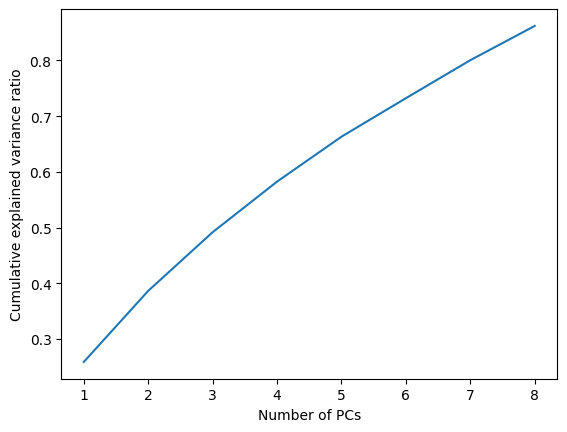

In [31]:
plt.plot(pd.Series(pca.explained_variance_ratio_.cumsum(), index=np.arange(1,9)))
plt.xlabel('Number of PCs')
plt.ylabel("Cumulative explained variance ratio");

In [32]:
pipe = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=5)),
    ('classifier', RandomForestRegressor())
])
pipe

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=5)),
                ('classifier', RandomForestRegressor())])

In [33]:
params= {
    'scaler': [StandardScaler(), None],
    'pca__n_components': [5,6,7],
    'classifier__max_depth': np.arange(3,7),
    'classifier__min_samples_leaf': [2,3,4]
}

gs = GridSearchCV(pipe, params, cv=5, scoring='neg_mean_absolute_error')
gs.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('pca', PCA(n_components=5)),
                                       ('classifier',
                                        RandomForestRegressor())]),
             param_grid={'classifier__max_depth': array([3, 4, 5, 6]),
                         'classifier__min_samples_leaf': [2, 3, 4],
                         'pca__n_components': [5, 6, 7],
                         'scaler': [StandardScaler(), None]},
             scoring='neg_mean_absolute_error')

## VALORACION DE MODELOS

In [102]:
# Funcion de Valoración de los modelos
def valoracion_modelos(tipo, modelo, Xtest, ytest):
    y_pred = modelo.predict(Xtest)
    print("R2_score",tipo, r2_score(ytest , y_pred))
    print("MAE", tipo, mean_absolute_error(ytest, y_pred))
    print("MSE",tipo, mean_squared_error(ytest, y_pred))
    print("MAPE",tipo,np.mean(np.abs((ytest-y_pred)/ytest)) * 100)

In [103]:
valoracion_modelos("pca_randomforest",gs, X_test, y_test )

R2_score pca_randomforest 0.8278721311775513
MAE pca_randomforest 119621.29812111023
MSE pca_randomforest 50080255541.73725
MAPE pca_randomforest 23.988085091554446


### Evaluacion modelos

In [104]:
valoracion_modelos("linear_model",linear_model, X_test, y_test )

R2_score linear_model 0.7491558315821971
MAE linear_model 148695.3066479008
MSE linear_model 72982603813.42606
MAPE linear_model 33.1827086926275


In [105]:
valoracion_modelos("linear_model_scal",linear_model_scal, X_test_scal, y_test )

R2_score linear_model_scal 0.7491558315821981
MAE linear_model_scal 148695.3066479018
MSE linear_model_scal 72982603813.42577
MAPE linear_model_scal 33.18270869262809


In [106]:
valoracion_modelos("Ridge",ridge_model, X_test, y_test )

R2_score Ridge 0.7491438695384725
MAE Ridge 148299.7213160161
MSE Ridge 72986084145.87096
MAPE Ridge 33.01425708736371


In [107]:
valoracion_modelos("Ridge_scal",ridge_model_scal, X_test_scal, y_test )

R2_score Ridge_scal 0.749168561867682
MAE Ridge_scal 148688.03820549193
MSE Ridge_scal 72978899962.59377
MAPE Ridge_scal 33.17895305886986


In [108]:
valoracion_modelos("Lasso",Lasso_model, X_test, y_test )

R2_score Lasso 0.7491570829491363
MAE Lasso 148690.47391514675
MSE Lasso 72982239730.74428
MAPE Lasso 33.1805921772023


In [109]:
valoracion_modelos("Lasso_scal",Lasso_model_scal, X_test_scal, y_test )

R2_score Lasso_scal 0.7491565911383775
MAE Lasso_scal 148694.39278844238
MSE Lasso_scal 72982382822.09055
MAPE Lasso_scal 33.18223691155038


In [110]:
valoracion_modelos('RandomForest',rf,X_test,y_test)

R2_score RandomForest 0.8901842960762529
MAE RandomForest 82530.26829039247
MSE RandomForest 31950657105.21224
MAPE RandomForest 15.37942497658654


In [111]:
valoracion_modelos('RandomForest_Scal',rf_scal,X_test_scal,y_test)

R2_score RandomForest_Scal 0.8902273451087914
MAE RandomForest_Scal 82740.6138646772
MSE RandomForest_Scal 31938132076.202705
MAPE RandomForest_Scal 15.430934719348746


In [112]:
valoracion_modelos('RandomForest_GS',rfr_gs,X_test,y_test)

R2_score RandomForest_GS 0.8627345195113544
MAE RandomForest_GS 95353.74925930714
MSE RandomForest_GS 39937114117.30549
MAPE RandomForest_GS 17.617173840881755


In [113]:
valoracion_modelos("GB",GB_model, X_test, y_test )

R2_score GB 0.871554863379477
MAE GB 101767.41738642924
MSE GB 37370852895.90373
MAPE GB 19.894489552761595


In [114]:
# valoracion_modelos('RandomForest',rfr_gs,X_test,y_test)

In [115]:
valoracion_modelos("pipeline",best_model,X_test,y_test)

R2_score pipeline 0.8901975768486365
MAE pipeline 82316.23431501452
MSE pipeline 31946793091.329338
MAPE pipeline 15.322686084597494


### Exportación de modelos

In [19]:
# Guardar el modelo con protocolo 4
with open('../Models/Rf.pkl', 'wb') as file:
    pickle.dump(rf, file, protocol=4)